In [1]:
import os
import cProfile
import numpy as np
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import sys
# sys.path.append('..')  # Add the parent directory to the sys.path
from model.model import City

In [2]:
# Set parameter values and run simulation
# Do param sweep with gamma (exponential), A and price (quadratic together)
num_steps  = 200
parameters = {
    'run_notes': 'Debugging model.',
    'width':     40,
    'height':    40,
}

def run_simulation(num_steps, parameters):
    city = City(num_steps, **parameters)
    city.run_model()

    agent_out = city.datacollector.get_agent_vars_dataframe()
    model_out = city.datacollector.get_model_vars_dataframe()
    return city, agent_out, model_out

city, agent_out, model_out = run_simulation(num_steps, parameters)
# Turn on for timing
# cProfile.run("agent_out, model_out = run_simulation(num_steps, parameters)", sort='cumulative')

# Filter agent data
person_df = agent_out.query("agent_type == 'Person'").dropna(axis=1, how='all').reset_index(drop=True)
land_df   = agent_out.query("agent_type == 'Land'").dropna(axis=1, how='all').reset_index(drop=True)
firm_df   = agent_out.query("agent_type == 'Firm'").dropna(axis=1, how='all').reset_index(drop=True)

In [3]:
# Setup variables for plotting

# Get time steps
# TODO get time steps from model df? Do I just need lenth/no time_steps
time_steps = person_df['time_step'].unique()
num_time_steps = len(time_steps)
time = np.arange(num_time_steps) # time array for the x-axis
person_middle_time_step = time_steps[num_time_steps // 2]

# Calculate the time step intervals
no_time_steps_to_plot = 5
time_step_interval = max(1, num_time_steps // (no_time_steps_to_plot - 1))
time_vals_to_plot = np.floor(np.linspace(1, (no_time_steps_to_plot - 1) * time_step_interval, no_time_steps_to_plot))
# print(time_vals_to_plot)

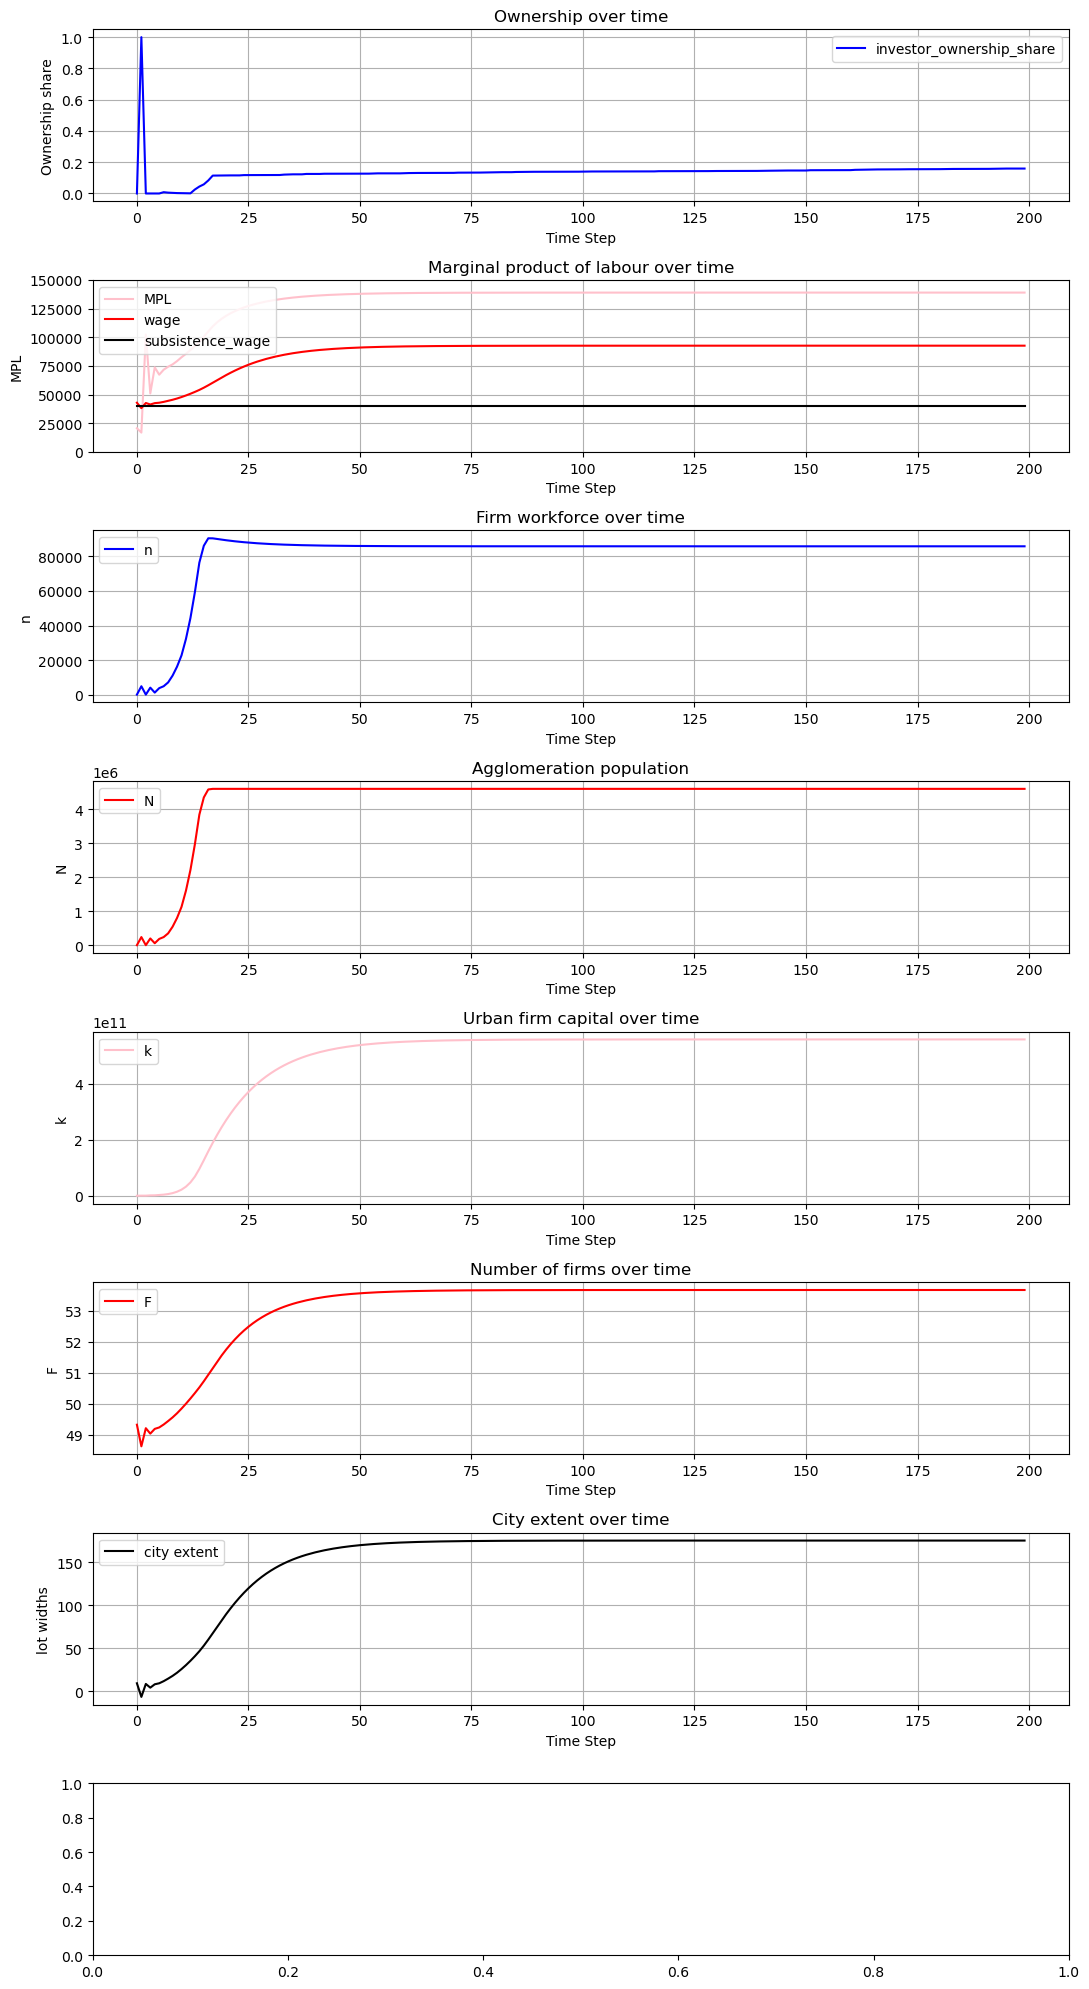

In [4]:
# Matplotlib line plots
import matplotlib.pyplot as plt

# Create a time array for the x-axis
time = np.arange(len(model_out['workers']))
# Create subplots with increased spacing
fig, axes = plt.subplots(8, 1, figsize=(11, 20)) # NUMBER OF PLOTS
# Adjust subplot spacing
fig.subplots_adjust(hspace=1.1)

# PRINT OUT PARAMETERS WITH PLOT
# c_value = parameters['c'] # LIST PARAMETERS
# price_of_output_value = parameters['price_of_output']
# density_value = parameters['density']
# A_value = parameters['A']

# param_string = f'c = {c_value}, price = {price_of_output_value}, density = {density_value}, A = {A_value}'
# plt.text(0.5, 0.92, param_string, transform=fig.transFigure, fontsize=12, ha='right')
 
# ADD PLOTS
# TODO Ownership
axes[0].plot(time, model_out['investor_ownership_share'], label='investor_ownership_share', color='blue') 
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Ownership share')
axes[0].set_title('Ownership over time')
axes[0].grid(True)
axes[0].legend()

# Plot MPL
axes[1].plot(time, model_out['MPL'], label='MPL', color='pink')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('MPL')
axes[1].plot(time, model_out['wage'], label='wage', color='red')
axes[1].plot(time, model_out['subsistence_wage'], label='subsistence_wage', color='black')
axes[1].set_ylim(0, 150000) 
axes[1].set_title('Marginal product of labour over time')
axes[1].grid(True)
axes[1].legend()

# Plot n
axes[2].plot(time, model_out['n'], label='n', color='blue')
axes[2].set_xlabel('Time Step')
axes[2].set_ylabel('n')
axes[2].set_title('Firm workforce over time')
axes[2].grid(True)
axes[2].legend()

# Plot N
# axes[3].plot(time, model_out['worker_agents'], label='worker_agents', color='blue')
axes[3].plot(time, model_out['N'], label='N', color='red') 
axes[3].set_xlabel('Time Step')
axes[3].set_ylabel('N')
axes[3].set_title('Agglomeration population')
axes[3].grid(True)
axes[3].legend()

# # N/F
# axes[4].plot(time, model_out['N']/model_out['F'], label='N/F', color='green') 
# axes[4].set_xlabel('Time Step')
# axes[4].set_ylabel('N/F')
# axes[4].set_title('Workforce/number of firms over time')
# axes[4].grid(True)
# axes[4].legend()

# Plot F
axes[5].plot(time, model_out['F'], label='F', color='red')
axes[5].set_xlabel('Time Step')
axes[5].set_ylabel('F')
axes[5].set_title('Number of firms over time')
axes[5].grid(True)
axes[5].legend()

# Plot city extent
axes[6].plot(time, model_out['city_extent_calc'], label='city extent', color='black')
axes[6].set_xlabel('Time Step')
axes[6].set_ylabel('lot widths')
axes[6].set_title('City extent over time')
axes[6].grid(True)
axes[6].legend()

# Plot k
axes[4].plot(time, model_out['k'], label='k', color='pink')
axes[4].set_xlabel('Time Step')
axes[4].set_ylabel('k')
axes[4].set_title('Urban firm capital over time')
axes[4].grid(True)
axes[4].legend()

# Total rents etc to think about
# p_dot is rising/falling as expected

# # Plot w , MPL
# axes[3].plot(time, model_out['MPL'], label='MPL', color='black')   
# axes[3].plot(time, model_out['wage'], label='wage', color='red')
# axes[3].plot(time, model_out['subsistence_wage'], ls = 'dotted', color='black')
# axes[3].plot(time, model_out['wage_premium'], label='wage premium', color='green')
# axes[3].set_xlabel('Time Step')
# axes[3].set_ylabel('Wage')
# axes[3].set_title('Plot of urban wage and MPL over time')
# axes[3].grid(True)
# axes[3].legend()

# # Plot y
# # Y = parameters['price_of_output'] * model_out['A_F'] * (parameters['mult'] * model_out['N'] + parameters['seed_population']) ** parameters['gamma'] * model_out['k'] ** parameters['alpha_F'] * model_out['n'] ** parameters['beta_F']
# axes[4].plot(time, model_out['y'], label='firm output', color='orange')
# axes[4].set_xlabel('Time Step')
# axes[4].set_ylabel('')
# axes[4].set_title('Plot of firm output over time')
# axes[4].grid(True)
# axes[4].legend()

# # Plot wage_premium - don't need
# axes[4].plot(time, model_out['wage_premium'], label='wage premium', color='brown')
# axes[4].set_xlabel('Time Step')
# axes[4].set_ylabel('$')
# axes[4].set_title('Plot of urban wage premium over time')
# axes[4].grid(True)
# axes[4].legend()


plt.tight_layout()

plt.show()

In [5]:
# Plot one row of heatmaps for ownership

# Find the min and max values
min_ownership = land_df['ownership_type'].min()
max_ownership = land_df['ownership_type'].max()

df = land_df
z = 'ownership_type'
color_scale = [[0, 'blue'], [1, 'red']]

# df = land_df
# z = 'warranted_price'
#  # z = 'warranted _rent' # z = 'realized_price' # z = 'net_rent'
# z = 'p_dot'
# color_scale = 'Viridis'

fig = make_subplots(
    rows=1,
    cols=no_time_steps_to_plot,
    shared_yaxes=True,
    subplot_titles=[f'Time Step {time_steps[i]}' for i in range(0, len(time_steps), len(time_steps)//(no_time_steps_to_plot-1))]
)

# Define x and y axis titles
x_axis_title = 'x'
y_axis_title = 'y'

for i, time_step in enumerate(time_vals_to_plot):
    df_at_time_step = df.query("time_step == @time_step")

    # Create an Is Working Heatmap with a colorbar TODO make sure there is a square aspect ratio
    heatmap1 = go.Heatmap(
        x=df_at_time_step['x'],
        y=df_at_time_step['y'],
        z=df_at_time_step[z],
        colorscale='Viridis',
        colorbar=dict(title=z),
        showscale=False,
        # showlegend=(i == 0)  # Show legend for the first plot in each row
        zmin=min_ownership,   # Set the color axis minimum
        zmax=max_ownership    # Set the color axis maximum
    )
    fig.add_trace(heatmap1, row=1, col=i + 1)

    # Label x and y axes for each subplot
    fig.update_xaxes(title_text=x_axis_title, row=1, col=i + 1)
fig.update_yaxes(title_text=y_axis_title, row=1, col=i + 1)

# Add a single color bar to the layout
fig.add_trace(go.Heatmap(x=[None], y=[None], z=[[min(df[z]), max(df[z])]], colorscale='Viridis', colorbar=dict(title=z)), row=1, col=no_time_steps_to_plot)

fig.update_layout(
    title_text=z,
    width=1000,
    height=350,
    title_x=0.5,   # Center the title
    title_y=0.97,  # Adjust the title position
)

fig.show()

In [6]:
# Plot one row of heatmaps for realized price in last time step

min_realized_price = land_df['realized_price'].min()
max_realized_price = land_df['realized_price'].max()

df = land_df
z = 'realized_price'
color_scale = [[0, 'blue'], [1, 'red']]

# df = land_df
# z = 'warranted_price'
#  # z = 'warranted _rent' # z = 'realized_price' # z = 'net_rent'
# z = 'p_dot'
# color_scale = 'Viridis'

fig = make_subplots(
    rows=1,
    cols=no_time_steps_to_plot,
    shared_yaxes=True,
    subplot_titles=[f'Time Step {time_steps[i]}' for i in range(0, len(time_steps), len(time_steps)//(no_time_steps_to_plot-1))]
)

# Define x and y axis titles
x_axis_title = 'x'
y_axis_title = 'y'

for i, time_step in enumerate(time_vals_to_plot):
    df_at_time_step = df.query("time_step == @time_step")

    # Create an Is Working Heatmap with a colorbar TODO make sure there is a square aspect ratio
    heatmap1 = go.Heatmap(
        x=df_at_time_step['x'],
        y=df_at_time_step['y'],
        z=df_at_time_step[z],
        colorscale=color_scale,
        colorbar=dict(title=z),
        showscale=False,
        # showlegend=(i == 0)  # Show legend for the first plot in each row
        zmin=min_realized_price,  # Set the color axis minimum
        zmax=max_realized_price   # Set the color axis maximum
    )
    fig.add_trace(heatmap1, row=1, col=i + 1)

    # Label x and y axes for each subplot
    fig.update_xaxes(title_text=x_axis_title, row=1, col=i + 1)
fig.update_yaxes(title_text=y_axis_title, row=1, col=i + 1)

# Add a single color bar to the layout
fig.add_trace(go.Heatmap(x=[None], y=[None], z=[[min(df[z]), max(df[z])]], colorscale=color_scale, colorbar=dict(title=z)), row=1, col=no_time_steps_to_plot)

fig.update_layout(
    title_text=z,
    width=1000,
    height=350,
    title_x=0.5,   # Center the title
    title_y=0.97,  # Adjust the title position
)

fig.show()

In [7]:
# Heatmap grid fast, plotly - 5 plots 5 data

# Define the names for each row
row_names = ['Is Working', 'Owner (1P, 2I, 3R/O)', 'Realized Price', 'All Realized Prices', 'Warranted Price']

# Find the min and max values
min_ownership = land_df['ownership_type'].min()
max_ownership = land_df['ownership_type'].max()

min_realized_price = land_df['realized_all_steps_price'].min()
max_realized_price = land_df['realized_all_steps_price'].max()

min_warranted_price = land_df['warranted_price'].min()
max_warranted_price = land_df['warranted_price'].max()


# Create subplots with Plotly
fig = sp.make_subplots(rows=len(row_names), cols=no_time_steps_to_plot, shared_yaxes=True)

# Define a custom color scale for the heatmap
color_scale = [[0, 'blue'], [1, 'red']]

# Create a list to store the titles for the columns
column_titles = []

# Set a fixed height for each row
row_height = 0.2  # You can adjust the height as needed

for i in range(no_time_steps_to_plot):
    time_step_index = min(i * time_step_interval, num_time_steps - 1)
    time_step = time_steps[time_step_index]
    person_df_at_time_step = person_df.query("time_step == @time_step")
    land_df_at_time_step = land_df.query("time_step == @time_step")

    # Calculate the number of rows and columns for each subplot
    num_rows, num_cols = 2, 3  # You can adjust these values to your preference

    # Create y-axis titles for the first plot in each row
    y_titles = [row_names[j] if j == 0 else '' for j in range(4)]

    # Create an Is Working Heatmap with square aspect ratio and a colorbar
    heatmap1 = go.Heatmap(
        x=person_df_at_time_step['x'],
        y=person_df_at_time_step['y'],
        z=person_df_at_time_step['is_working'],
        colorscale=color_scale,
        colorbar=dict(title='Is Working'),
        showlegend=(i == 0)  # Show legend for the first plot in each row
    )
    fig.add_trace(heatmap1, row=1, col=i+1)

    # Create a Owner Heatmap with square aspect ratio and a colorbar
    heatmap2 = go.Heatmap(
        x=land_df_at_time_step['x'],
        y=land_df_at_time_step['y'],
        z=land_df_at_time_step['ownership_type'],
        colorscale='Viridis',
        colorbar=dict(title='Ownership Type'),
        showlegend=(i == 0),  # Show legend for the first plot in each row
        zmin=min_ownership,   # Set the color axis minimum
        zmax=max_ownership    # Set the color axis maximum
    )
    fig.add_trace(heatmap2, row=2, col=i+1)

    # Create a Realized Price Heatmap with square aspect ratio and a colorbar
    heatmap3 = go.Heatmap(
        x=land_df_at_time_step['x'],
        y=land_df_at_time_step['y'],
        z=land_df_at_time_step['realized_price'],
        colorscale='Viridis',
        colorbar=dict(title='Realized Price'),
        showlegend=(i == 0),  # Show legend for the first plot in each row
        zmin=min_realized_price,  # Set the color axis minimum
        zmax=max_realized_price   # Set the color axis maximum
    )
    fig.add_trace(heatmap3, row=3, col=i+1)

    # Create an All Realized Price Heatmap with square aspect ratio and a colorbar
    heatmap3 = go.Heatmap(
        x=land_df_at_time_step['x'],
        y=land_df_at_time_step['y'],
        z=land_df_at_time_step['realized_all_steps_price'],
        colorscale='Viridis',
        colorbar=dict(title='Realized Price'),
        showlegend=(i == 0),  # Show legend for the first plot in each row
        zmin=min_realized_price,  # Set the color axis minimum
        zmax=max_realized_price   # Set the color axis maximum
    )
    fig.add_trace(heatmap3, row=4, col=i+1)

    # Create a Warranted Price Heatmap with square aspect ratio and a colorbar
    heatmap3 = go.Heatmap(
        x=land_df_at_time_step['x'],
        y=land_df_at_time_step['y'],
        z=land_df_at_time_step['warranted_price'],
        colorscale='Viridis',
        colorbar=dict(title='Warranted Price'),
        showlegend=(i == 0),  # Show legend for the first plot in each row
        zmin=min_warranted_price,  # Set the color axis minimum
        zmax=max_warranted_price   # Set the color axis maximum
    )
    fig.add_trace(heatmap3, row=5, col=i+1)

    # Add the time step as a column title
    column_titles.append(f'Time Step {time_step}')

# Update the layout to set y-axis titles
for j, title in enumerate(row_names):
    fig.update_yaxes(title_text=title, row=j+1, col=1)

# Update the layout to set column titles
fig.update_layout(
    title_text="Visualizations with Plotly",
    width=1000,
    height=1000,  # Adjust the height as needed
    title_x=0.5,  # Center the title
    title_y=0.97,  # Adjust the title position
)

for i, title in enumerate(column_titles):
    fig.update_xaxes(title_text=title, row=4, col=i+1)

fig.show()

In [8]:
# # Plot firm wage delta over time
# import plotly.express as px
# wage_delta_values = firm_df['wage_delta'].dropna().tolist()

# fig = px.scatter(firm_df, x='time_step', y='wage_delta', title='Firm Wage Delta over Time', labels={'wage_delta': 'Wage Delta', 'time_step': 'Time Step'})

# # Customize the layout if needed
# fig.update_layout(
#     width=800,
#     height=500,
#     xaxis_title='Time Step',
#     yaxis_title='Wage Delta',
#     title_x=0.5,  # Center the title
#     title_y=0.9,  # Adjust the title position
# )

# fig.show()

In [9]:
# # Plot a scatter plot of filtered p_dot values
# # TODO count number of outliers canceled.

# # Randomly sample the dataframe for plotting if slow
# df = land_df#.sample(frac=0.7)
# z = 'p_dot'

# # Function to filter outliers using the IQR method
# def filter_outliers(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return series[(series >= lower_bound) & (series <= upper_bound)]

# # Apply the filter_outliers function to p_dot values
# filtered_df = df.copy()
# # filtered_df[z] = filter_outliers(filtered_df[z]) # Comment to remove filtering

# # To make earlier time steps appear on top of later ones, sort the DataFrame by 'time_step' in descending order
# filtered_df.sort_values(by='time_step', inplace=True, ascending=False)

# # Extract the filtered p_dot, distance_from_center, and time_step data
# p_dot_values = filtered_df[z]
# distance_from_center = filtered_df['distance_from_center']
# time_steps = filtered_df['time_step']

# # Create a scatter plot with a thin line connecting all points at the same time
# fig = make_subplots(rows=1, cols=1, subplot_titles=[f'{z} vs Distance from Center and Time (Filtered)'])

# scatter = fig.add_trace(go.Scatter(
#     x=distance_from_center,
#     y=p_dot_values,
#     mode='markers+lines',  # Add 'lines' mode to connect points with lines
#     marker=dict(
#         # size= 5 + time_steps/12,
#         color=time_steps,
#         opacity=0.7,
#         colorscale='plasma',
#         colorbar=dict(title='Time Step')
#     ),
#     line=dict(width=0.5, color='black'),  # Set line width and color
#     text=time_steps,
# ))

# # Set layout options
# fig.update_layout(
#     xaxis=dict(title='Distance from Center'),
#     yaxis=dict(title=z, tickformat=".0e"),  # Set tick format to scientific notation with zero decimal places
# )

# # Show the figure
# fig.show()

In [10]:
# # MAIN SCATTER Commented out since it redefines time_steps and causes errors above
# # # Extract the realized_price, distance_from_center, and time_step data
# # realized_prices = land_df['realized_price']
# # distance_from_center = land_df['distance_from_center']
# # time_steps = land_df['time_step']

# # Filter realized price of -1 out of data
# realized_prices = land_df[land_df['realized_price'] != -1]['realized_price']
# distance_from_center = land_df[land_df['realized_price'] != -1]['distance_from_center']
# time_steps = land_df[land_df['realized_price'] != -1]['time_step']

# # Define a colormap for different time steps
# cmap = 'plasma'

# # Normalize time_steps to use as color and size
# norm_time_steps = (time_steps - time_steps.min()) / (time_steps.max() - time_steps.min())
# colors = norm_time_steps  # Use normalized values directly as colors
# # sizes = 10 + 60 * norm_time_steps  # Adjust the size based on time steps
# sizes = 5 + 10 * norm_time_steps  # Adjust the size based on time steps

# # Create a scatter plot
# fig = go.Figure()

# scatter = fig.add_trace(go.Scatter(
#     x=distance_from_center,
#     y=realized_prices,
#     mode='markers',
#     marker=dict(
#         size=sizes,
#         color=colors,
#         opacity=0.7,
#         colorscale=cmap,  # Use 'plasma' directly as the color scale
#         colorbar=dict(title='Time Step')
#     ),
#     text=time_steps
# ))

# # Set layout options
# fig.update_layout(
#     title='Realized Price vs Distance from Center',
#     xaxis=dict(title='Distance from Center'),
#     yaxis=dict(title='Realized Price'),
# )

# # Show the figure
# fig.show()


In [11]:
run_id = city.run_id

def plot_ownership_data(model_out):
    # Extract data from model_out
    urban_resident_owners    = np.array(model_out['urban_resident_owners'])
    urban_investor_owners    = np.array(model_out['urban_investor_owners'])
    # urban_other_owners       = np.array(model_out['urban_other_owners'])
    investor_ownership_share = np.array(model_out['investor_ownership_share'])

    # Create subplots
    fig = go.Figure()

    # Add traces to the subplot
    fig.add_trace(go.Bar(x=np.arange(len(urban_resident_owners)), y=urban_resident_owners, name='Resident Owners'))
    fig.add_trace(go.Bar(x=np.arange(len(urban_investor_owners)), y=urban_investor_owners, name='Investor Owners'))
    # fig.add_trace(go.Bar(x=np.arange(len(urban_other_owners)),    y=urban_other_owners,    name='Other Owners'))

    # Create a new y-axis for the investor ownership share
    fig.add_trace(go.Scatter(x=np.arange(len(investor_ownership_share)), y=investor_ownership_share, mode='lines', line=dict(color='red'), yaxis='y2', name='Investor Ownership Share'))

    # Update plot layout and labels
    fig.update_layout(
        title_text="Ownership Data Visualization", showlegend=True, 
        xaxis=dict(title='Time'),
        yaxis=dict(title='Owner Count'),
        yaxis2=dict(title='Person Ownership Share', overlaying='y', side='right', range=[0, 1]),
        legend=dict(x=1.15, y=1.0),  # Adjust the legend position
        annotations=[
            dict(
                x=0.5,
                y=-0.25,
                xref='paper',
                yref='paper',
                text=f"Run ID: {run_id}",
                showarrow=False,
                font=dict(size=12),
            )
        ]
    )

    # # Save the Plotly figure as an image
    # image_filename = os.path.join(city.figures_folder, f'ownership_plotly_plot_{run_id}.png')
    # fig.write_image(image_filename)

    # Save the Plotly figure as a PDF
    pdf_filename = os.path.join(city.figures_folder, f'ownership_plotly_plot.pdf')
    fig.write_image(pdf_filename, format='pdf')

    # Show the Plotly figure
    fig.show()

# Call the function to generate and save the Plotly figure
plot_ownership_data(model_out)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:

def plot_model_data(model_out):
    workers = np.array(model_out['workers'])
    wage_premium = np.array(model_out['wage_premium'])
    wage = np.array(model_out['wage'])
    city_extent_calc = np.array(model_out['city_extent_calc'])

    # Create subplots with Plotly
    fig = sp.make_subplots(rows=4, cols=2, subplot_titles=[
        'Evolution of the Wage (Rises)',
        'Evolution of the Workforce (Rises)',
        'Evolution of the City Extent (Rises)',
        'City Extent and Workforce (Curves Up)',
        'City Extent and Wage (Curves Up)',
        'Workforce Response to Wage',
    ])

    # Add traces for each subplot
    fig.add_trace(go.Scatter(x=time, y=wage, mode='lines'), row=1, col=1)
    fig.add_trace(go.Scatter(x=time, y=workers, mode='lines'), row=1, col=2)
    fig.add_trace(go.Scatter(x=time, y=city_extent_calc, mode='lines'), row=2, col=1)
    fig.add_trace(go.Scatter(x=city_extent_calc, y=workers, mode='lines'), row=2, col=2)
    fig.add_trace(go.Scatter(x=time, y=city_extent_calc, mode='lines'), row=3, col=1)
    fig.add_trace(go.Scatter(x=wage, y=workers, mode='lines'), row=3, col=2)

    # Update layout
    fig.update_layout(title_text='Model Output', title_font_size=16, width=1000, height=1000)

    # Show the figure
    fig.show()

# Call the function with your model_out
plot_model_data(model_out)

In [ ]:

# Matplotlib line plots
import matplotlib.pyplot as plt

# Create a time array for the x-axis
time = np.arange(len(model_out['workers']))

# Create subplots with a 4x2 grid
fig, axes = plt.subplots(4, 2, figsize=(15, 15))  # 4 rows, 2 columns
# Adjust subplot spacing
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# PRINT OUT PARAMETERS WITH PLOT
c_value = parameters['c']  # LIST PARAMETERS
price_of_output_value = parameters['price_of_output']
density_value = parameters['density']
A_value = parameters['A']

param_string = f'c = {c_value}, price = {price_of_output_value}, density = {density_value}, A = {A_value}'
plt.suptitle(param_string, fontsize=12)

# Plot MPL
axes[0, 0].plot(time, model_out['MPL'], label='MPL', color='pink')
axes[0, 0].set_xlabel('Time Step')
axes[0, 0].set_ylabel('MPL')
axes[0, 0].set_title('Marginal product of labour over time')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot n
axes[0, 1].plot(time, model_out['n'], label='n', color='blue')
axes[0, 1].set_xlabel('Time Step')
axes[0, 1].set_ylabel('n')
axes[0, 1].set_title('Urban firm workforce over time')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot N
axes[1, 0].plot(time, model_out['N'], label='N', color='red')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('N')
axes[1, 0].set_title('Firm size over time')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot F
axes[1, 1].plot(time, model_out['F'], label='F', color='red')
axes[1, 1].set_xlabel('Time Step')
axes[1, 1].set_ylabel('F')
axes[1, 1].set_title('Number of firms over time')
axes[1, 1].grid(True)
axes[1, 1].legend()

# Plot city extent
axes[2, 0].plot(time, model_out['city_extent_calc'], label='city_extent_calc', color='black')
axes[2, 0].set_xlabel('Time Step')
axes[2, 0].set_ylabel('Lot widths')
axes[2, 0].set_title('City extent over time')
axes[2, 0].grid(True)
axes[2, 0].legend()

# Plot N/F
axes[2, 1].plot(time, model_out['N']/model_out['F'], label='N/F', color='green')
axes[2, 1].set_xlabel('Time Step')
axes[2, 1].set_ylabel('N/F')
axes[2, 1].set_title('Workforce divided by number of firms over time')
axes[2, 1].grid(True)
axes[2, 1].legend()

# Plot 'investor_ownership_share'
axes[3, 0].plot(time, model_out['investor_ownership_share'], label='investor_ownership_share', color='blue')
axes[3, 0].set_xlabel('Time Step')
axes[3, 0].set_ylabel('Ownership share')
axes[3, 0].set_title('Ownership share over time')
axes[3, 0].grid(True)
axes[3, 0].legend()

# Plot 'k'
axes[3, 1].plot(time, model_out['k'], label='k', color='pink')
axes[3, 1].set_xlabel('Time Step')
axes[3, 1].set_ylabel('k')
axes[3, 1].set_title('Urban firm capital over time')
axes[3, 1].grid(True)
axes[3, 1].legend()

plt.show()


In [ ]:
# Matplotlib line plots
import matplotlib.pyplot as plt

# Create a time array for the x-axis
time = np.arange(len(model_out['workers']))

# Create subplots with a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # 2 rows, 4 columns
# Adjust subplot spacing
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# PRINT OUT PARAMETERS WITH PLOT
c_value = parameters['c']  # LIST PARAMETERS
price_of_output_value = parameters['price_of_output']
density_value = parameters['density']
A_value = parameters['A']

param_string = f'c = {c_value}, price = {price_of_output_value}, density = {density_value}, A = {A_value}'
plt.suptitle(param_string, fontsize=12)

# Plot MPL
axes[0, 0].plot(time, model_out['MPL'], label='MPL', color='pink')
axes[0, 0].set_xlabel('Time Step')
axes[0, 0].set_ylabel('MPL')
axes[0, 0].set_title('Marginal product of labour')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot N
axes[0, 1].plot(time, model_out['N'], label='N', color='red')
axes[0, 1].set_xlabel('Time Step')
axes[0, 1].set_ylabel('N, Pop')
axes[0, 1].set_title('Urban workforce and population')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot city extent
axes[0, 2].plot(time, model_out['city_extent_calc'], label='city_extent_calc', color='black')
axes[0, 2].set_xlabel('Time Step')
axes[0, 2].set_ylabel('lot widths')
axes[0, 2].set_title('City extent')
axes[0, 2].grid(True)
axes[0, 2].legend()

# Plot 'investor_ownership_share'
axes[0, 3].plot(time, model_out['investor_ownership_share'], label='investor_ownership_share', color='blue')
axes[0, 3].set_xlabel('Time Step')
axes[0, 3].set_ylabel('Ownership share')
axes[0, 3].set_title('Ownership share')
axes[0, 3].grid(True)
axes[0, 3].legend()

# Plot n
axes[1, 0].plot(time, model_out['n'], label='n', color='blue')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('n')
axes[1, 0].set_title('Urban firm workforce')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot F
axes[1, 1].plot(time, model_out['F'], label='F', color='red')
axes[1, 1].set_xlabel('Time Step')
axes[1, 1].set_ylabel('F')
axes[1, 1].set_title('Number of firms')
axes[1, 1].grid(True)
axes[1, 1].legend()

# Plot N/F
axes[1, 2].plot(time, model_out['N']/model_out['F'], label='N/F', color='green')
axes[1, 2].set_xlabel('Time Step')
axes[1, 2].set_ylabel('N/F')
axes[1, 2].set_title('Workforce/number of firms')
axes[1, 2].grid(True)
axes[1, 2].legend()

# Plot 'k'
axes[1, 3].plot(time, model_out['k'], label='k', color='pink')
axes[1, 3].set_xlabel('Time Step')
axes[1, 3].set_ylabel('k')
axes[1, 3].set_title('Urban firm capital')
axes[1, 3].grid(True)
axes[1, 3].legend()

plt.show()


In [ ]:
# City Extent

# Create the first figure
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot MPL with specified line properties
ax.plot(time, model_out['city_extent_calc'], linewidth=2, linestyle='-', color='blue') #, label='City Extent')
# ax.plot(time, model_out['wage'], color='red', label='wage')

# Add text to the figure
ax.text(0.5, -0.3, f"Run ID: {city.run_id}", ha='center', transform=ax.transAxes, fontsize=12)

# Set labels and title
ax.set_xlabel('Time Step', fontsize=14)
ax.set_ylabel('Lots', fontsize=14)
ax.set_title('City Extent Over Time', fontsize=16)

# Add legend
# ax.legend()

# Save the figure as a PDF
pdf_filename = os.path.join(city.figures_folder, f'city_extent.pdf')
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# MPL

# Create the first figure
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot MPL with specified line properties
ax.plot(time, model_out['MPL'], linewidth=2, linestyle='-', color='blue') #, label='MPL')
# ax.plot(time, model_out['wage'], color='red', label='wage')

# Add text to the figure
ax.text(0.5, -0.3, f"Run ID: {city.run_id}", ha='center', transform=ax.transAxes, fontsize=12)

# Set labels and title
ax.set_xlabel('Time Step', fontsize=14)
ax.set_ylabel('MPL ($)', fontsize=14)
ax.set_title('MPL Over Time', fontsize=16)

# Add legend
# ax.legend()

# Save the figure as a PDF
pdf_filename = os.path.join(city.figures_folder, f'mpl.pdf')
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# MPL and Wage

# Create the first figure
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot MPL with specified line properties
ax.plot(time, model_out['MPL'], linewidth=2, linestyle='-', color='blue', label='MPL')
ax.plot(time, model_out['wage'], color='red', label='wage')

# Add text to the figure
ax.text(0.5, -0.3, f"Run ID: {city.run_id}", ha='center', transform=ax.transAxes, fontsize=12)

# Set labels and title
ax.set_xlabel('Time Step', fontsize=14)
ax.set_ylabel('MPL ($)', fontsize=14)
ax.set_title('MPL and Wage Over Time', fontsize=16)

# Add legend
ax.legend()

# Save the figure as a PDF
pdf_filename = os.path.join(city.figures_folder, f'mpl_and_wage.pdf')
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# Number of Firms

# Create the first figure
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed

# Plot MPL with specified line properties
ax.plot(time, model_out['F'], linewidth=2, linestyle='-', color='blue') #, label='F')
# ax.plot(time, model_out['wage'], color='red', label='wage')

# Add text to the figure
ax.text(0.5, -0.3, f"Run ID: {city.run_id}", ha='center', transform=ax.transAxes, fontsize=12)

# Set labels and title
ax.set_xlabel('Time Step', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of Firms', fontsize=16)

# Add legend
# ax.legend()

# Save the figure as a PDF
pdf_filename = os.path.join(city.figures_folder, f'no_firms.pdf')
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
